In [1]:
# Coal Mine Project - Exploratory Data Analysis (EDA)
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configure display settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print("Libraries imported successfully!")
print("Ready for Coal Mine Data Analysis 🏭")

Libraries imported successfully!
Ready for Coal Mine Data Analysis 🏭


In [2]:
# Load and Combine All Dataset Batches
print("Loading dataset batches...")

# Get all CSV files in the current directory
csv_files = glob.glob("batch*.csv")
print(f"Found {len(csv_files)} batch files: {csv_files}")

# Load and combine all batch files
dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    df['batch_source'] = file  # Add source tracking
    dataframes.append(df)
    print(f"Loaded {file}: {df.shape[0]} rows, {df.shape[1]} columns")

# Combine all dataframes
if dataframes:
    coal_data = pd.concat(dataframes, ignore_index=True)
    print(f"\n✅ Successfully combined all batches!")
    print(f"Total dataset shape: {coal_data.shape}")
    print(f"Memory usage: {coal_data.memory_usage().sum() / 1024**2:.2f} MB")
else:
    print("❌ No batch files found!")

Loading dataset batches...
Found 10 batch files: ['batch1.csv', 'batch10.csv', 'batch2.csv', 'batch3.csv', 'batch4.csv', 'batch5.csv', 'batch6.csv', 'batch7.csv', 'batch8.csv', 'batch9.csv']
Loaded batch1.csv: 445 rows, 130 columns
Loaded batch10.csv: 3600 rows, 130 columns
Loaded batch2.csv: 1244 rows, 130 columns
Loaded batch3.csv: 1586 rows, 130 columns
Loaded batch4.csv: 161 rows, 130 columns
Loaded batch5.csv: 197 rows, 130 columns
Loaded batch6.csv: 2300 rows, 130 columns
Loaded batch7.csv: 3613 rows, 130 columns
Loaded batch8.csv: 294 rows, 130 columns
Loaded batch9.csv: 470 rows, 130 columns

✅ Successfully combined all batches!
Total dataset shape: (13910, 130)
Memory usage: 13.80 MB


In [3]:
# Dataset Overview and Basic Information
print("="*60)
print("📊 COAL MINE DATASET OVERVIEW")
print("="*60)

# Basic dataset information
print(f"Dataset Shape: {coal_data.shape}")
print(f"Total Features: {coal_data.shape[1] - 2}")  # Excluding 'label' and 'batch_source'
print(f"Total Samples: {coal_data.shape[0]:,}")
print(f"Missing Values: {coal_data.isnull().sum().sum()}")

print("\n" + "="*40)
print("📈 LABEL DISTRIBUTION")
print("="*40)

# Label distribution
label_counts = coal_data['label'].value_counts().sort_index()
print("Label Distribution:")
for label, count in label_counts.items():
    percentage = (count / len(coal_data)) * 100
    print(f"  Label {label}: {count:,} samples ({percentage:.2f}%)")

# Check if this is a classification problem
unique_labels = coal_data['label'].nunique()
print(f"\nNumber of unique labels: {unique_labels}")
print(f"Label data type: {coal_data['label'].dtype}")

print("\n" + "="*40)
print("🔍 DATA TYPES & QUALITY")
print("="*40)

# Data types summary
print(f"Data Types Summary:")
print(coal_data.dtypes.value_counts())

print(f"\nFeature columns: {[col for col in coal_data.columns if col.startswith('feature_')][:10]}...") # Show first 10 feature names

print("\n" + "="*40)
print("📁 BATCH DISTRIBUTION")  
print("="*40)

# Batch distribution
batch_counts = coal_data['batch_source'].value_counts()
print("Samples per batch:")
for batch, count in batch_counts.items():
    percentage = (count / len(coal_data)) * 100
    print(f"  {batch}: {count:,} samples ({percentage:.2f}%)")

print("\n✅ Dataset loaded and analyzed successfully!")

📊 COAL MINE DATASET OVERVIEW
Dataset Shape: (13910, 130)
Total Features: 128
Total Samples: 13,910
Missing Values: 0

📈 LABEL DISTRIBUTION
Label Distribution:
  Label 1: 2,565 samples (18.44%)
  Label 2: 2,926 samples (21.04%)
  Label 3: 1,641 samples (11.80%)
  Label 4: 1,936 samples (13.92%)
  Label 5: 3,009 samples (21.63%)
  Label 6: 1,833 samples (13.18%)

Number of unique labels: 6
Label data type: int64

🔍 DATA TYPES & QUALITY
Data Types Summary:
float64    128
int64        1
object       1
Name: count, dtype: int64

Feature columns: ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']...

📁 BATCH DISTRIBUTION
Samples per batch:
  batch7.csv: 3,613 samples (25.97%)
  batch10.csv: 3,600 samples (25.88%)
  batch6.csv: 2,300 samples (16.53%)
  batch3.csv: 1,586 samples (11.40%)
  batch2.csv: 1,244 samples (8.94%)
  batch9.csv: 470 samples (3.38%)
  batch1.csv: 445 samples (3.20%)
  batch8.csv: 294 sample

In [4]:
# Statistical Analysis of Features
print("="*60)
print("📊 COMPREHENSIVE STATISTICAL ANALYSIS")
print("="*60)

# Select only feature columns for analysis
feature_cols = [col for col in coal_data.columns if col.startswith('feature_')]
features_data = coal_data[feature_cols]

print(f"Analyzing {len(feature_cols)} features...")

# Descriptive Statistics
print("\n" + "="*40)
print("📈 DESCRIPTIVE STATISTICS")
print("="*40)

desc_stats = features_data.describe()
print(desc_stats)

# Additional statistics
print(f"\nAdditional Statistics:")
print(f"Skewness Range: {features_data.skew().min():.4f} to {features_data.skew().max():.4f}")
print(f"Kurtosis Range: {features_data.kurtosis().min():.4f} to {features_data.kurtosis().max():.4f}")

# Identify highly skewed features (|skewness| > 2)
high_skew = features_data.skew().abs()[features_data.skew().abs() > 2]
print(f"Highly skewed features (|skew| > 2): {len(high_skew)}")
if len(high_skew) > 0:
    print("Top 10 most skewed features:")
    print(high_skew.sort_values(ascending=False).head(10))

# Feature value ranges
print(f"\n📊 Feature Ranges:")
feature_ranges = features_data.max() - features_data.min()
print(f"Smallest range: {feature_ranges.min():.4f} (Feature: {feature_ranges.idxmin()})")
print(f"Largest range: {feature_ranges.max():.4f} (Feature: {feature_ranges.idxmax()})")
print(f"Mean range: {feature_ranges.mean():.4f}")

# Zero and constant features check
zero_var_features = features_data.columns[features_data.var() == 0].tolist()
low_var_features = features_data.columns[features_data.var() < 0.01].tolist()

print(f"\n🔍 Feature Variability:")
print(f"Zero variance features: {len(zero_var_features)}")
print(f"Low variance features (var < 0.01): {len(low_var_features)}")

if zero_var_features:
    print(f"Zero variance features: {zero_var_features}")
if low_var_features and len(low_var_features) <= 10:
    print(f"Low variance features: {low_var_features}")

print("\n✅ Statistical analysis completed!")

📊 COMPREHENSIVE STATISTICAL ANALYSIS
Analyzing 128 features...

📈 DESCRIPTIVE STATISTICS
        feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
count  13910.0000 13910.0000 13910.0000 13910.0000 13910.0000 13910.0000   
mean   50435.0662     6.6382    12.9367    18.7440    26.8907    -9.1587   
std    69844.7860    13.4864    17.6101    24.8994    38.1077    12.7292   
min   -16757.5986     0.0883     0.0001     0.0001     0.0001  -131.3329   
25%     6694.7260     2.2848     1.6334     2.3868     4.9680   -11.5872   
50%    19364.4394     3.8712     4.9771     7.2509    11.6807    -3.3387   
75%    63104.8371     8.4006    17.1892    26.4111    34.8432    -1.1269   
max   670687.3477  1339.8793   167.0798   226.6195   993.6053    -0.0069   

       feature_7  feature_8   feature_9  feature_10  feature_11  feature_12  \
count 13910.0000 13910.0000  13910.0000  13910.0000  13910.0000  13910.0000   
mean    -14.4024   -59.9276  57340.1046      6.6480     15.5384     

📊 DATA VISUALIZATION - PART 1


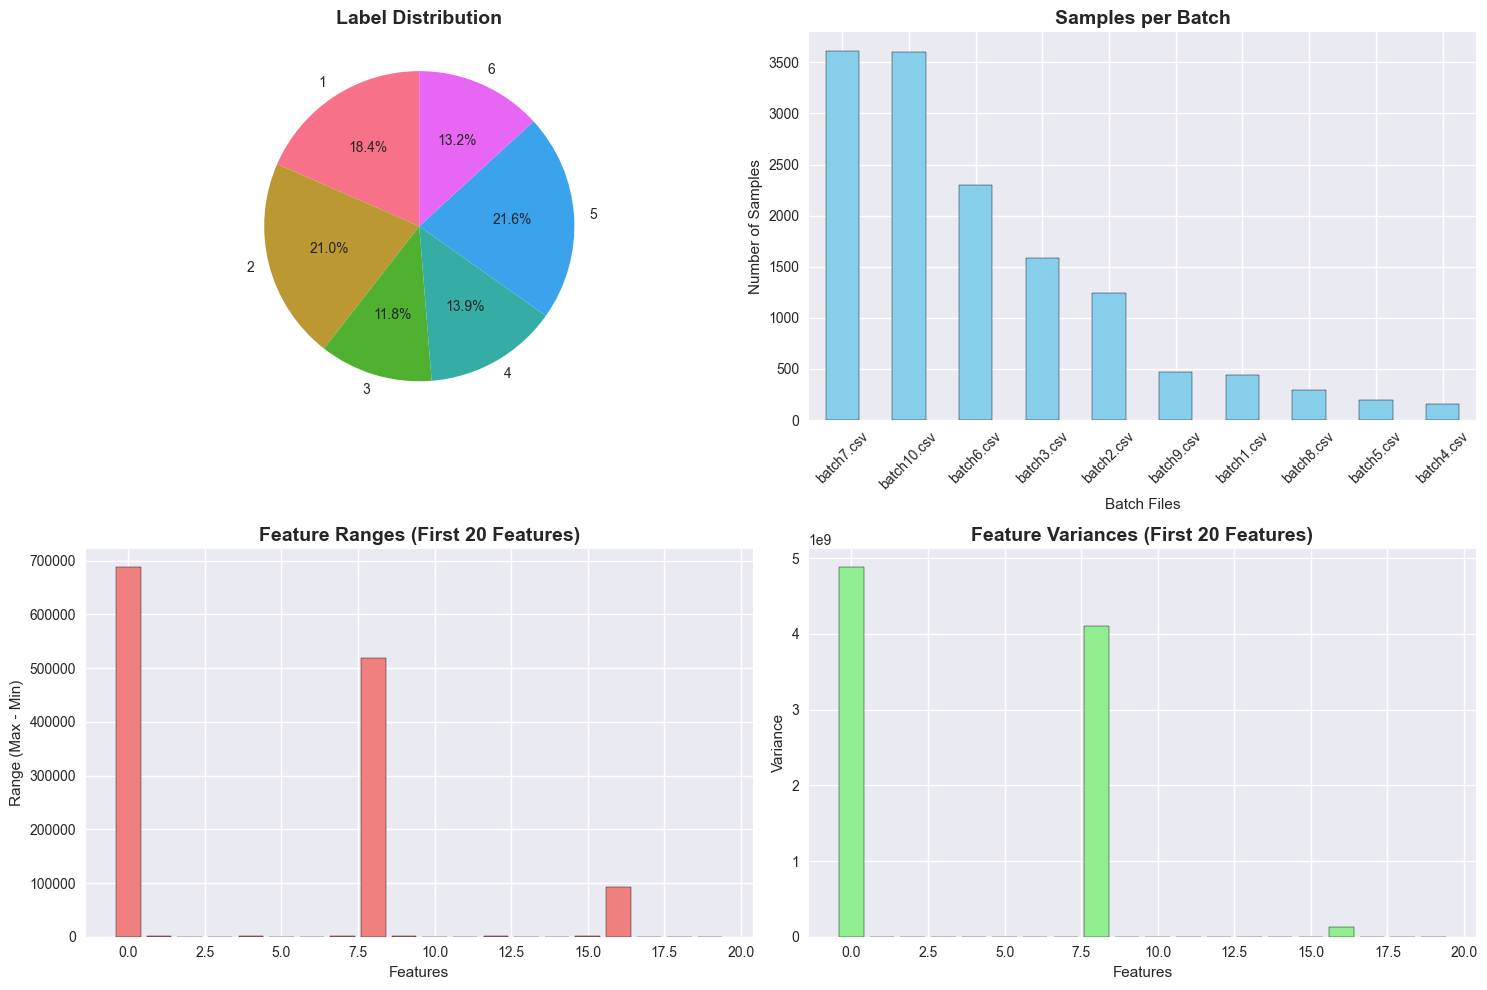

✅ Basic visualization plots completed!


In [5]:
# Data Visualization - Part 1: Label Distribution and Basic Plots

print("="*60)
print("📊 DATA VISUALIZATION - PART 1")
print("="*60)

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Label Distribution
axes[0, 0].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Label Distribution', fontsize=14, fontweight='bold')

# 2. Batch Distribution  
batch_counts.plot(kind='bar', ax=axes[0, 1], color='skyblue', edgecolor='black')
axes[0, 1].set_title('Samples per Batch', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Batch Files')
axes[0, 1].set_ylabel('Number of Samples')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Feature Ranges Distribution
feature_ranges_sample = feature_ranges.head(20)  # Show first 20 features
axes[1, 0].bar(range(len(feature_ranges_sample)), feature_ranges_sample.values, 
               color='lightcoral', edgecolor='black')
axes[1, 0].set_title('Feature Ranges (First 20 Features)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Features')
axes[1, 0].set_ylabel('Range (Max - Min)')

# 4. Feature Variance Distribution
feature_variances = features_data.var().head(20)
axes[1, 1].bar(range(len(feature_variances)), feature_variances.values, 
               color='lightgreen', edgecolor='black')
axes[1, 1].set_title('Feature Variances (First 20 Features)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Variance')

plt.tight_layout()
plt.show()

print("✅ Basic visualization plots completed!")

📊 DATA VISUALIZATION - PART 2: FEATURE DISTRIBUTIONS
Analyzing detailed distributions for 13 sample features...


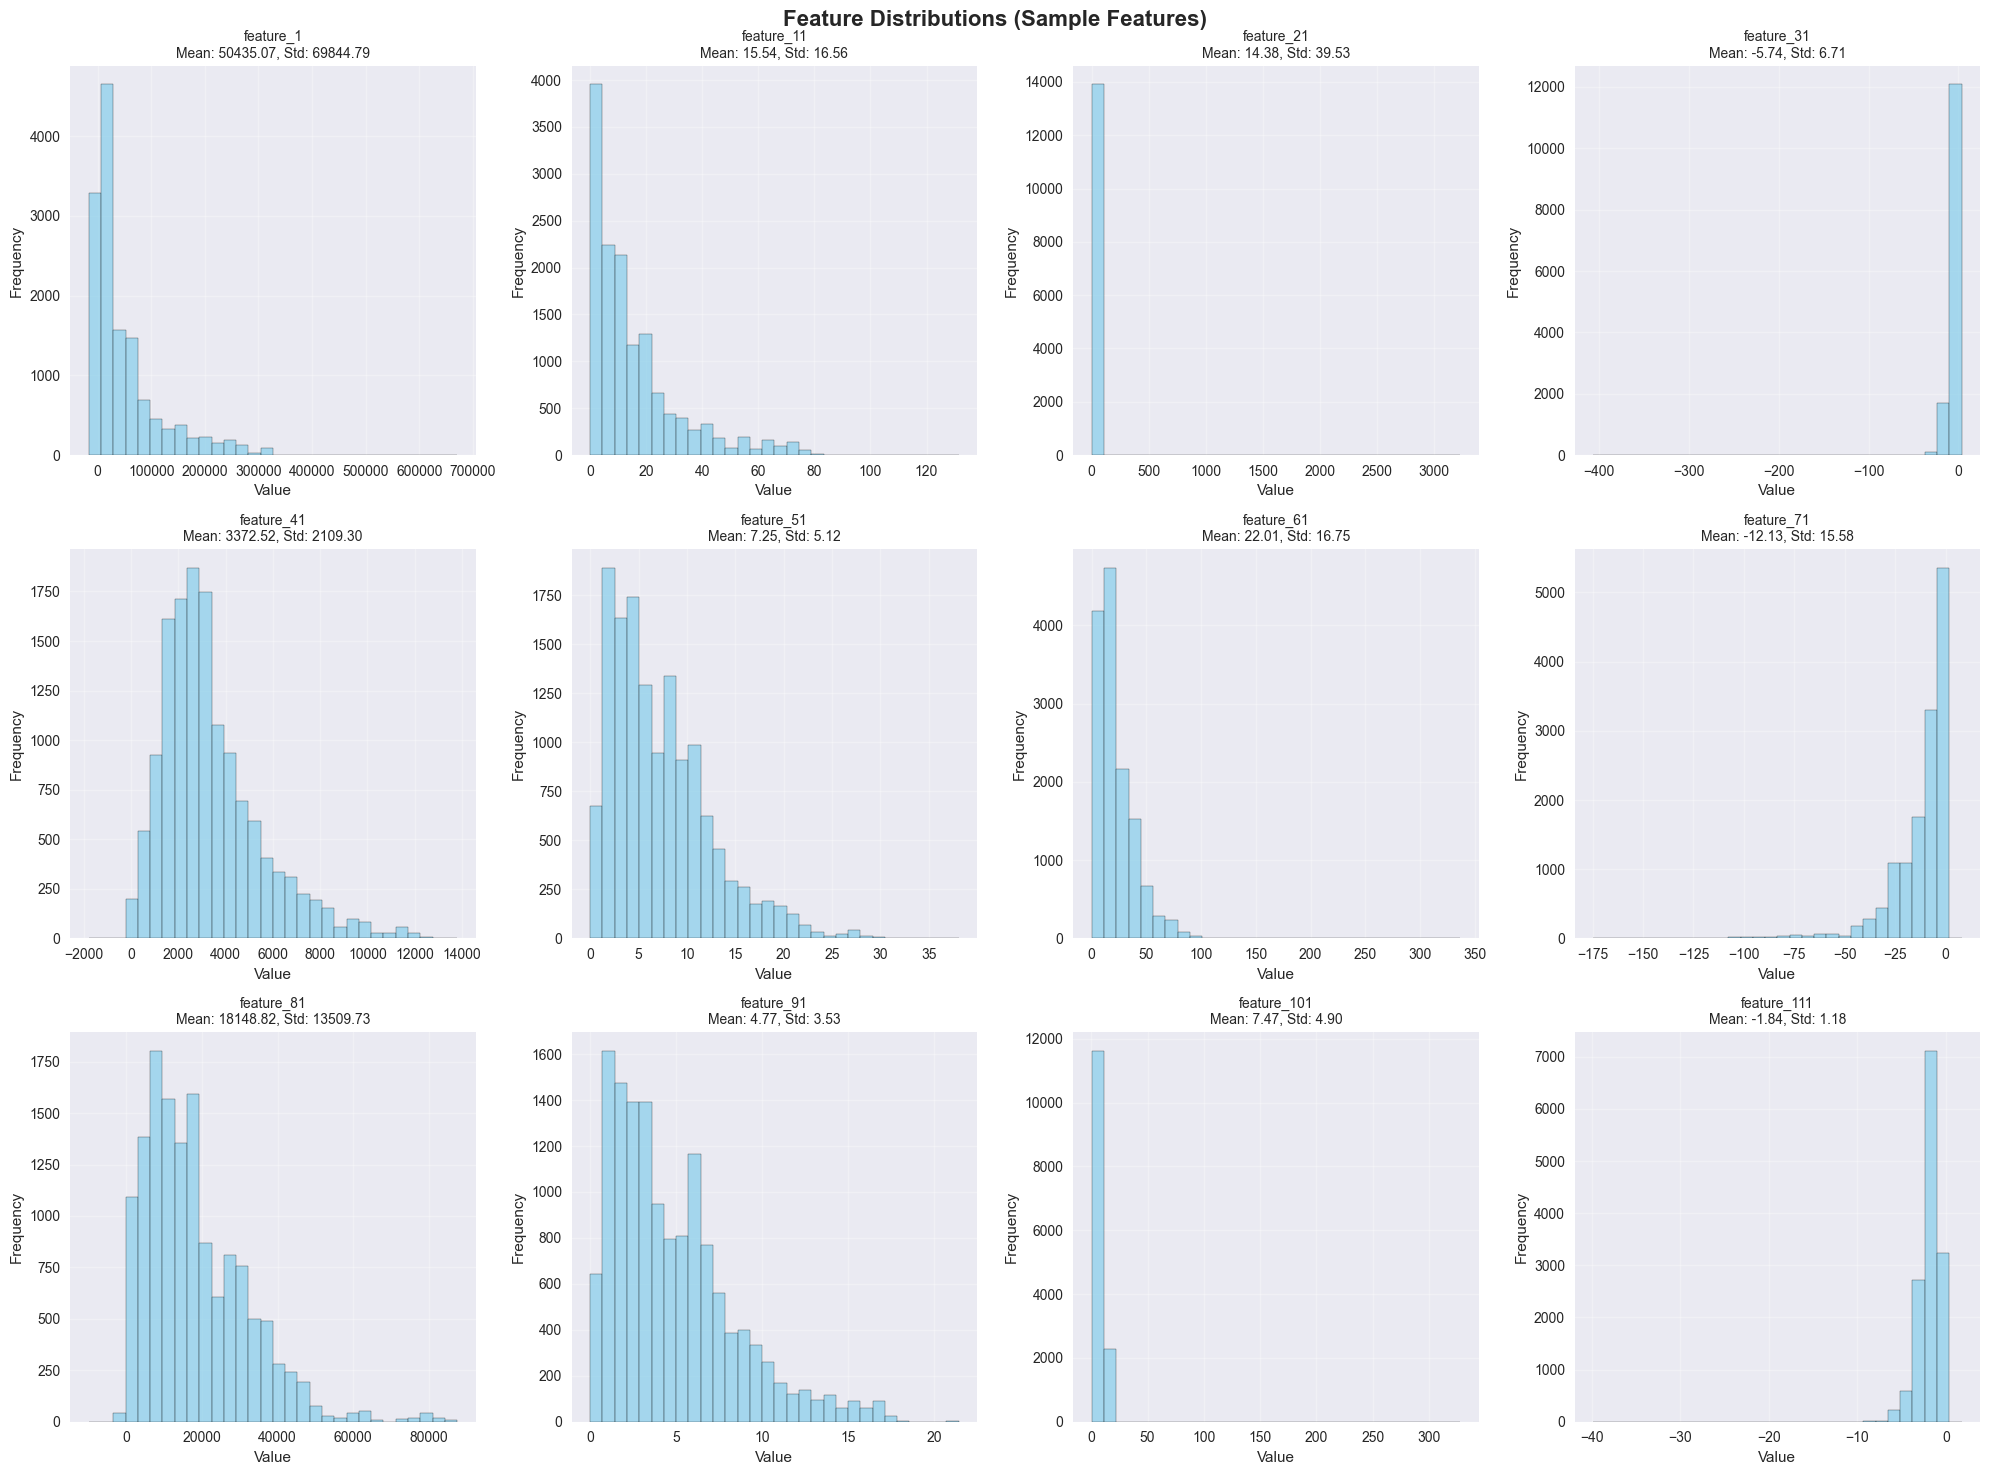


📊 Feature distributions by Label (Box Plots)


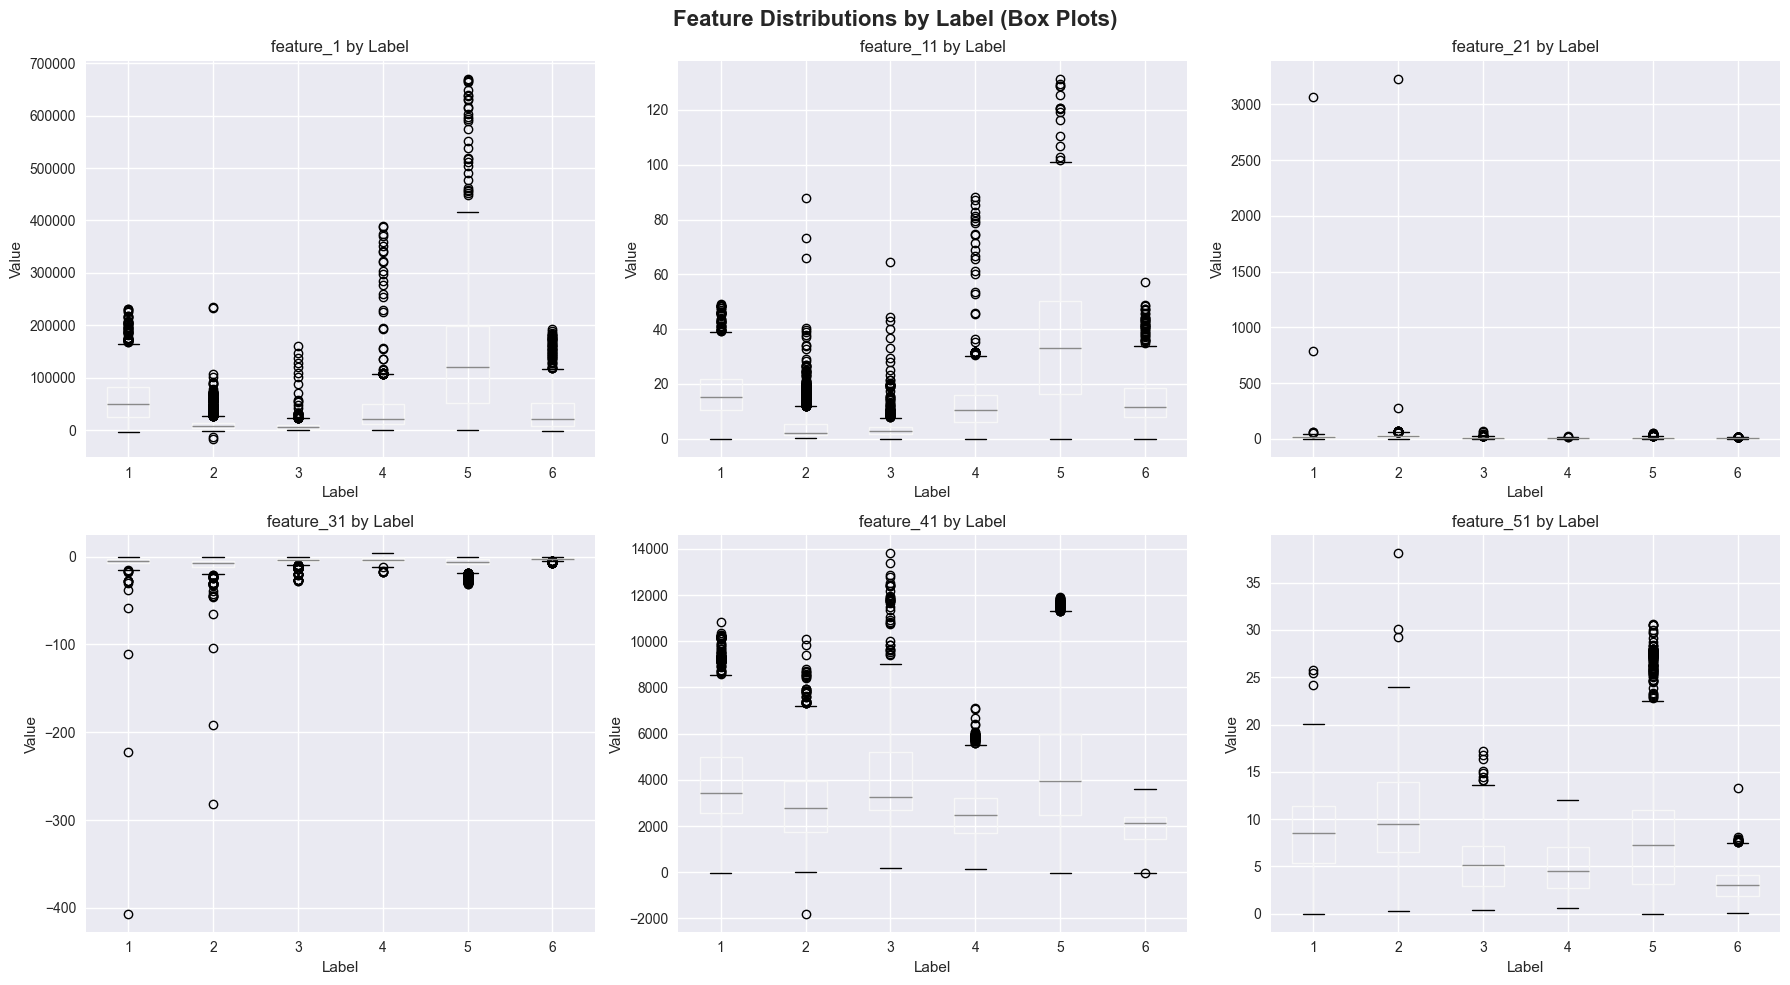

✅ Feature distribution analysis completed!


In [6]:
# Data Visualization - Part 2: Feature Distributions and Statistical Plots

print("="*60)
print("📊 DATA VISUALIZATION - PART 2: FEATURE DISTRIBUTIONS")
print("="*60)

# Sample features for detailed analysis (select every 10th feature)
sample_features = feature_cols[::10]  # Every 10th feature
print(f"Analyzing detailed distributions for {len(sample_features)} sample features...")

# Create comprehensive distribution plots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

for i, feature in enumerate(sample_features[:12]):
    if i < len(axes):
        # Distribution plot
        axes[i].hist(coal_data[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'{feature}\nMean: {coal_data[feature].mean():.2f}, Std: {coal_data[feature].std():.2f}', 
                         fontsize=10)
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(sample_features), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Feature Distributions (Sample Features)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Box plots to show distributions by label
print("\n📊 Feature distributions by Label (Box Plots)")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(sample_features[:6]):
    if i < len(axes):
        coal_data.boxplot(column=feature, by='label', ax=axes[i])
        axes[i].set_title(f'{feature} by Label')
        axes[i].set_xlabel('Label')
        axes[i].set_ylabel('Value')

plt.suptitle('Feature Distributions by Label (Box Plots)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Feature distribution analysis completed!")

📊 CORRELATION ANALYSIS
Correlation analysis for 50 features...
Found 120 feature pairs with |correlation| > 0.8

Top 10 highly correlated feature pairs:
  1. feature_42 ↔ feature_50: 0.9984
  2. feature_17 ↔ feature_25: 0.9963
  3. feature_3 ↔ feature_4: 0.9928
  4. feature_22 ↔ feature_30: 0.9901
  5. feature_37 ↔ feature_45: 0.9880
  6. feature_11 ↔ feature_12: 0.9876
  7. feature_33 ↔ feature_41: 0.9852
  8. feature_1 ↔ feature_3: 0.9837
  9. feature_36 ↔ feature_44: 0.9819
  10. feature_9 ↔ feature_11: 0.9818


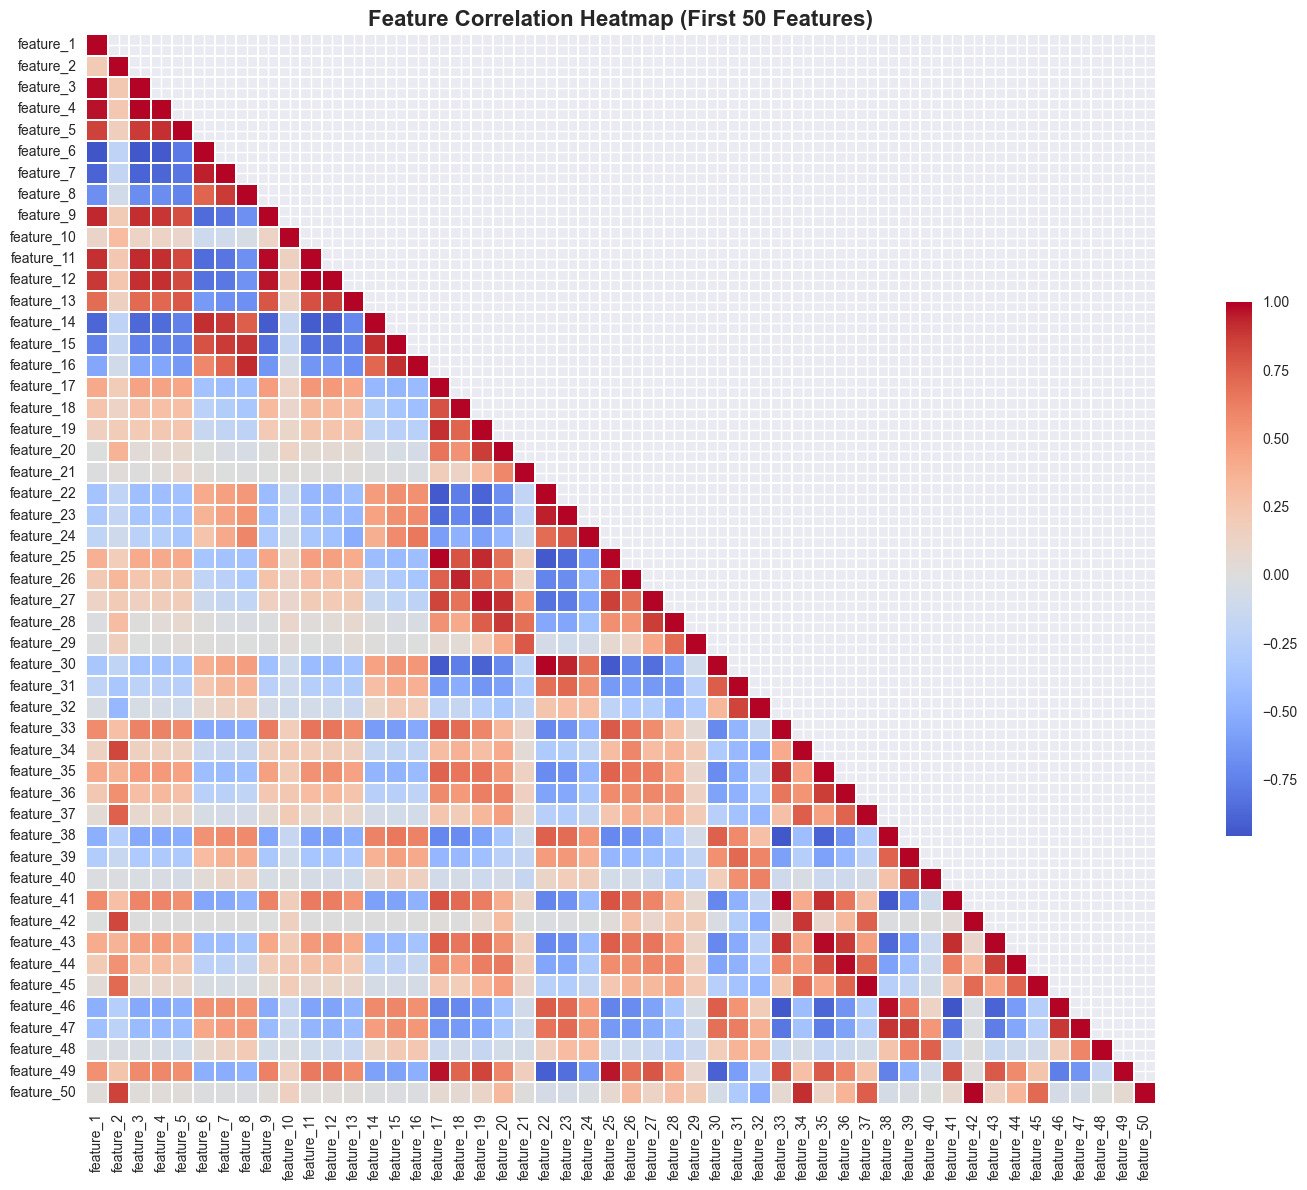


📊 Feature Correlations with Label:
Top 10 features most correlated with label:
  1. feature_108: -0.5140 (|0.5140|)
  2. feature_100: -0.5003 (|0.5003|)
  3. feature_52: -0.4657 (|0.4657|)
  4. feature_60: -0.4652 (|0.4652|)
  5. feature_124: -0.4625 (|0.4625|)
  6. feature_116: -0.4586 (|0.4586|)
  7. feature_125: -0.4576 (|0.4576|)
  8. feature_92: -0.4536 (|0.4536|)
  9. feature_61: -0.4442 (|0.4442|)
  10. feature_53: -0.4395 (|0.4395|)

✅ Correlation analysis completed!


In [7]:
# Correlation Analysis and Heatmap

print("="*60)
print("📊 CORRELATION ANALYSIS")
print("="*60)

# Calculate correlation matrix for a subset of features (due to memory constraints)
n_features_for_corr = min(50, len(feature_cols))  # Limit to first 50 features for visualization
selected_features = feature_cols[:n_features_for_corr]
correlation_matrix = coal_data[selected_features].corr()

print(f"Correlation analysis for {n_features_for_corr} features...")

# Find highly correlated feature pairs
high_corr_pairs = []
threshold = 0.8

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], corr_val))

print(f"Found {len(high_corr_pairs)} feature pairs with |correlation| > {threshold}")

# Display top correlated pairs
if high_corr_pairs:
    high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    print("\nTop 10 highly correlated feature pairs:")
    for i, (feat1, feat2, corr) in enumerate(high_corr_pairs[:10]):
        print(f"  {i+1}. {feat1} ↔ {feat2}: {corr:.4f}")

# Create correlation heatmap
plt.figure(figsize=(15, 12))
mask = np.triu(correlation_matrix, k=1)  # Mask upper triangle
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.1, cbar_kws={"shrink": 0.5})
plt.title(f'Feature Correlation Heatmap (First {n_features_for_corr} Features)', 
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation with label
print(f"\n📊 Feature Correlations with Label:")
label_correlations = coal_data[feature_cols + ['label']].corr()['label'].drop('label')
label_correlations_abs = label_correlations.abs().sort_values(ascending=False)

print("Top 10 features most correlated with label:")
for i, (feature, corr) in enumerate(label_correlations_abs.head(10).items()):
    original_corr = label_correlations[feature]
    print(f"  {i+1}. {feature}: {original_corr:.4f} (|{corr:.4f}|)")

print("\n✅ Correlation analysis completed!")

📊 DIMENSIONALITY REDUCTION & ADVANCED VISUALIZATION
Preparing data for dimensionality reduction...
Using random sample of 5000 samples for visualization

🔍 Performing PCA...


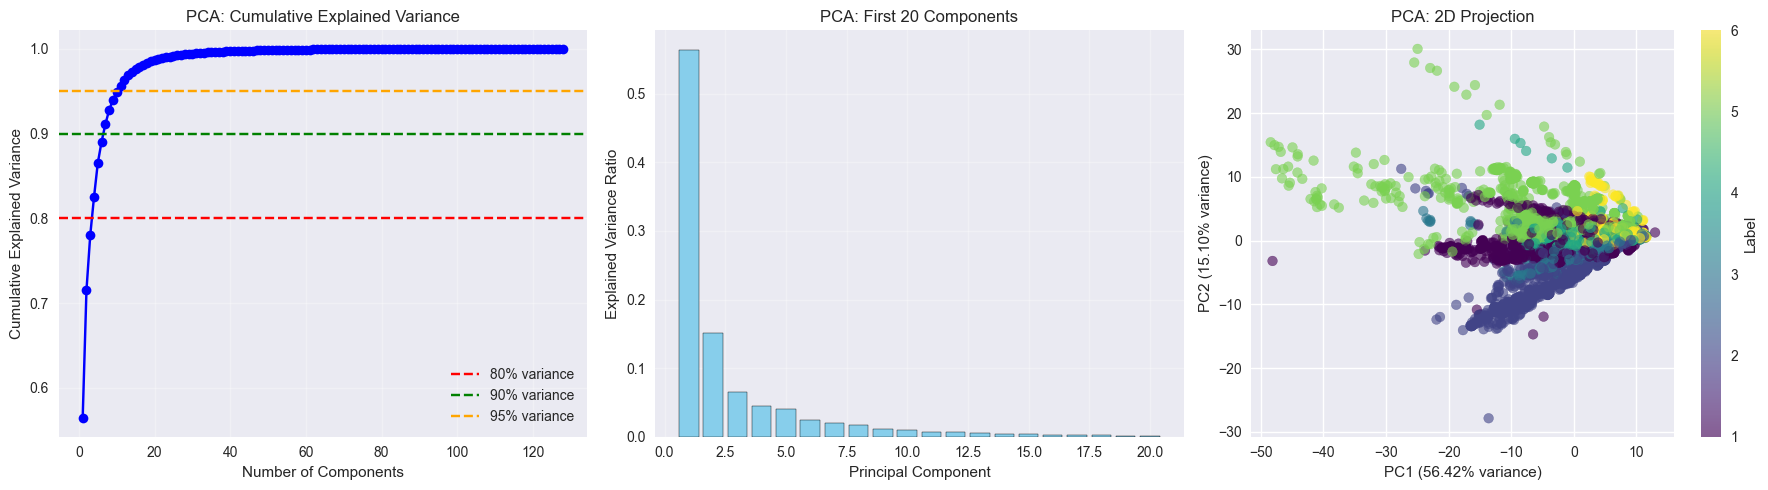

📊 PCA Insights:
  Components needed for 80% variance: 4
  Components needed for 90% variance: 7
  Components needed for 95% variance: 11
  Total original features: 128

✅ PCA analysis completed!


In [8]:
# Dimensionality Reduction and Advanced Visualization

print("="*60)
print("📊 DIMENSIONALITY REDUCTION & ADVANCED VISUALIZATION")
print("="*60)

# Prepare data for dimensionality reduction
print("Preparing data for dimensionality reduction...")

# Use a sample for visualization if dataset is too large
max_samples = 5000
if len(coal_data) > max_samples:
    sample_indices = np.random.choice(len(coal_data), max_samples, replace=False)
    sample_data = coal_data.iloc[sample_indices]
    print(f"Using random sample of {max_samples} samples for visualization")
else:
    sample_data = coal_data
    print(f"Using full dataset ({len(sample_data)} samples)")

# Prepare features and labels
X_sample = sample_data[feature_cols].values
y_sample = sample_data['label'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# 1. Principal Component Analysis (PCA)
print("\n🔍 Performing PCA...")
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Cumulative explained variance
cumvar = np.cumsum(pca.explained_variance_ratio_)
axes[0].plot(range(1, len(cumvar) + 1), cumvar, 'bo-')
axes[0].axhline(y=0.8, color='r', linestyle='--', label='80% variance')
axes[0].axhline(y=0.9, color='g', linestyle='--', label='90% variance')
axes[0].axhline(y=0.95, color='orange', linestyle='--', label='95% variance')
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Cumulative Explained Variance')
axes[0].set_title('PCA: Cumulative Explained Variance')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# First 20 components
axes[1].bar(range(1, 21), pca.explained_variance_ratio_[:20], color='skyblue', edgecolor='black')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Explained Variance Ratio')
axes[1].set_title('PCA: First 20 Components')
axes[1].grid(True, alpha=0.3)

# 2D PCA scatter plot
scatter = axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample, cmap='viridis', alpha=0.6)
axes[2].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
axes[2].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
axes[2].set_title('PCA: 2D Projection')
plt.colorbar(scatter, ax=axes[2], label='Label')

plt.tight_layout()
plt.show()

# Print PCA insights
n_components_80 = np.argmax(cumvar >= 0.8) + 1
n_components_90 = np.argmax(cumvar >= 0.9) + 1
n_components_95 = np.argmax(cumvar >= 0.95) + 1

print(f"📊 PCA Insights:")
print(f"  Components needed for 80% variance: {n_components_80}")
print(f"  Components needed for 90% variance: {n_components_90}")
print(f"  Components needed for 95% variance: {n_components_95}")
print(f"  Total original features: {len(feature_cols)}")

print("\n✅ PCA analysis completed!")

In [9]:
# Statistical Tests and Advanced Analysis

print("="*60)
print("📊 STATISTICAL TESTS & ADVANCED ANALYSIS")
print("="*60)

# Separate features by label for statistical testing
label_groups = {}
for label in coal_data['label'].unique():
    label_groups[label] = coal_data[coal_data['label'] == label][feature_cols]
    print(f"Label {label}: {len(label_groups[label])} samples")

# Statistical tests for feature differences between labels
print(f"\n🔍 Statistical Tests (comparing labels):")

if len(label_groups) == 2:
    # Two-sample tests
    labels = list(label_groups.keys())
    group1, group2 = labels[0], labels[1]
    
    significant_features = []
    p_values = {}
    
    print(f"Performing t-tests between Label {group1} and Label {group2}...")
    
    # Perform t-tests for first 20 features (to avoid overwhelming output)
    test_features = feature_cols[:20]
    
    for feature in test_features:
        data1 = label_groups[group1][feature].dropna()
        data2 = label_groups[group2][feature].dropna()
        
        # Perform t-test
        t_stat, p_val = stats.ttest_ind(data1, data2)
        p_values[feature] = p_val
        
        if p_val < 0.05:
            significant_features.append((feature, p_val, t_stat))
    
    print(f"\nSignificant features (p < 0.05) among first {len(test_features)} features tested:")
    print(f"Found {len(significant_features)} significant features")
    
    if significant_features:
        # Sort by p-value
        significant_features.sort(key=lambda x: x[1])
        print("\nTop 10 most significant features:")
        for i, (feature, p_val, t_stat) in enumerate(significant_features[:10]):
            print(f"  {i+1}. {feature}: p-value = {p_val:.6f}, t-stat = {t_stat:.4f}")

# Feature importance using variance and separability
print(f"\n📊 Feature Importance Analysis:")

# Calculate separability score (difference in means / pooled standard deviation)
separability_scores = {}
for feature in feature_cols[:50]:  # Analyze first 50 features
    if len(label_groups) == 2:
        labels = list(label_groups.keys())
        mean1 = label_groups[labels[0]][feature].mean()
        mean2 = label_groups[labels[1]][feature].mean()
        std1 = label_groups[labels[0]][feature].std()
        std2 = label_groups[labels[1]][feature].std()
        
        # Pooled standard deviation
        n1, n2 = len(label_groups[labels[0]]), len(label_groups[labels[1]])
        pooled_std = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / (n1+n2-2))
        
        if pooled_std > 0:
            separability = abs(mean1 - mean2) / pooled_std
            separability_scores[feature] = separability

if separability_scores:
    # Sort features by separability
    sorted_separability = sorted(separability_scores.items(), key=lambda x: x[1], reverse=True)
    
    print("Top 10 features by separability score:")
    for i, (feature, score) in enumerate(sorted_separability[:10]):
        print(f"  {i+1}. {feature}: {score:.4f}")

# Outlier detection summary
print(f"\n🔍 Outlier Detection (IQR method):")
outlier_counts = {}

for feature in feature_cols[:20]:  # Check first 20 features
    Q1 = coal_data[feature].quantile(0.25)
    Q3 = coal_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = coal_data[(coal_data[feature] < lower_bound) | (coal_data[feature] > upper_bound)]
    outlier_counts[feature] = len(outliers)

# Show features with most outliers
if outlier_counts:
    sorted_outliers = sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)
    print("Features with most outliers (first 20 features checked):")
    for i, (feature, count) in enumerate(sorted_outliers[:10]):
        percentage = (count / len(coal_data)) * 100
        print(f"  {i+1}. {feature}: {count} outliers ({percentage:.2f}%)")

print("\n✅ Statistical analysis completed!")

📊 STATISTICAL TESTS & ADVANCED ANALYSIS
Label 1: 2565 samples
Label 2: 2926 samples
Label 3: 1641 samples
Label 4: 1936 samples
Label 5: 3009 samples
Label 6: 1833 samples

🔍 Statistical Tests (comparing labels):

📊 Feature Importance Analysis:

🔍 Outlier Detection (IQR method):
Features with most outliers (first 20 features checked):
  1. feature_16: 1862 outliers (13.39%)
  2. feature_8: 1767 outliers (12.70%)
  3. feature_1: 1418 outliers (10.19%)
  4. feature_7: 1295 outliers (9.31%)
  5. feature_6: 1283 outliers (9.22%)
  6. feature_9: 1225 outliers (8.81%)
  7. feature_15: 1139 outliers (8.19%)
  8. feature_3: 1134 outliers (8.15%)
  9. feature_5: 1004 outliers (7.22%)
  10. feature_14: 1000 outliers (7.19%)

✅ Statistical analysis completed!


In [10]:
# Data Quality Assessment and Summary Report

print("="*60)
print("📊 DATA QUALITY ASSESSMENT & SUMMARY REPORT")
print("="*60)

# Data Quality Metrics
print("🔍 Data Quality Assessment:")

# 1. Missing Data Analysis
missing_data = coal_data.isnull().sum()
missing_percentage = (missing_data / len(coal_data)) * 100
features_with_missing = missing_data[missing_data > 0]

print(f"\n1. Missing Data:")
print(f"   Total missing values: {missing_data.sum()}")
print(f"   Features with missing data: {len(features_with_missing)}")
if len(features_with_missing) > 0:
    print("   Features with missing data:")
    for feature, count in features_with_missing.items():
        print(f"     {feature}: {count} ({missing_percentage[feature]:.2f}%)")

# 2. Data Consistency
print(f"\n2. Data Consistency:")
print(f"   Label consistency: {coal_data['label'].dtype} type")
print(f"   Unique labels: {sorted(coal_data['label'].unique())}")
print(f"   Feature data types: All numeric")

# 3. Data Completeness
total_cells = coal_data.shape[0] * coal_data.shape[1]
missing_cells = coal_data.isnull().sum().sum()
completeness = ((total_cells - missing_cells) / total_cells) * 100

print(f"\n3. Data Completeness:")
print(f"   Dataset completeness: {completeness:.2f}%")

# 4. Feature Summary for Coal Mine Analysis
print(f"\n📋 COAL MINE DATASET SUMMARY REPORT")
print("="*50)

print(f"Dataset Characteristics:")
print(f"  • Total samples: {coal_data.shape[0]:,}")
print(f"  • Total features: {len(feature_cols)}")
print(f"  • Data completeness: {completeness:.2f}%")
print(f"  • Memory usage: {coal_data.memory_usage().sum() / 1024**2:.2f} MB")

print(f"\nLabel Distribution:")
for label, count in label_counts.items():
    percentage = (count / len(coal_data)) * 100
    print(f"  • Label {label}: {count:,} samples ({percentage:.2f}%)")

print(f"\nFeature Characteristics:")
print(f"  • Feature value ranges: {feature_ranges.min():.2f} to {feature_ranges.max():.2f}")
print(f"  • Average feature variance: {features_data.var().mean():.4f}")
print(f"  • Highly skewed features (|skew| > 2): {len(high_skew) if 'high_skew' in locals() else 'Not calculated'}")
if 'high_corr_pairs' in locals():
    print(f"  • Highly correlated pairs (|r| > 0.8): {len(high_corr_pairs)}")

print(f"\nData Source:")
print(f"  • Number of batch files: {len(csv_files)}")
print(f"  • Batch files processed: {', '.join(csv_files)}")

# Recommendations
print(f"\n💡 RECOMMENDATIONS FOR MODEL TRAINING:")
print("="*50)

recommendations = []

# Based on data quality
if completeness > 99:
    recommendations.append("✅ Excellent data quality - no missing values to handle")
elif completeness > 95:
    recommendations.append("⚠️  Good data quality - minimal missing values")
else:
    recommendations.append("❗ Handle missing values before model training")

# Based on feature count
if len(feature_cols) > 100:
    recommendations.append("📊 High-dimensional dataset - consider dimensionality reduction")
    recommendations.append(f"   Suggested: Use {n_components_95 if 'n_components_95' in locals() else '~50'} components for 95% variance")

# Based on label distribution
label_ratio = label_counts.max() / label_counts.min() if len(label_counts) > 1 else 1
if label_ratio > 10:
    recommendations.append("⚖️  Highly imbalanced dataset - use appropriate sampling techniques")
elif label_ratio > 3:
    recommendations.append("⚖️  Moderately imbalanced dataset - consider class weights")
else:
    recommendations.append("✅ Well-balanced dataset")

# Based on correlations
if 'high_corr_pairs' in locals() and len(high_corr_pairs) > 10:
    recommendations.append("🔗 Many highly correlated features - consider feature selection")

for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

print(f"\n🎯 READY FOR MODEL TRAINING!")
print("="*50)
print("The dataset has been thoroughly analyzed and is ready for machine learning model development.")
print("Consider the recommendations above to optimize your model performance.")

print("\n✅ EDA completed successfully! 🎉")

📊 DATA QUALITY ASSESSMENT & SUMMARY REPORT
🔍 Data Quality Assessment:

1. Missing Data:
   Total missing values: 0
   Features with missing data: 0

2. Data Consistency:
   Label consistency: int64 type
   Unique labels: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
   Feature data types: All numeric

3. Data Completeness:
   Dataset completeness: 100.00%

📋 COAL MINE DATASET SUMMARY REPORT
Dataset Characteristics:
  • Total samples: 13,910
  • Total features: 128
  • Data completeness: 100.00%
  • Memory usage: 13.80 MB

Label Distribution:
  • Label 1: 2,565 samples (18.44%)
  • Label 2: 2,926 samples (21.04%)
  • Label 3: 1,641 samples (11.80%)
  • Label 4: 1,936 samples (13.92%)
  • Label 5: 3,009 samples (21.63%)
  • Label 6: 1,833 samples (13.18%)

Feature Characteristics:
  • Feature value ranges: 3.80 to 687444.95
  • Average feature variance: 119418976.1011
  • Highly skewed features (|skew| > 2): 84
  • Highly correlated pairs (|r| > 0.8): 120